# pyVista plotting tests

07/03/20

## Basic tests
https://docs.pyvista.org/getting-started/installation.html#test-installation

Compilation failed:

TypeError: Symbol.asyncIterator is not defined.
    at __asyncValues (/home/femtolab/anaconda3/envs/epsdev/lib/python3.7/site-packages/bokeh/server/static/js/compiler.js:149:19)
    at /home/femtolab/anaconda3/envs/epsdev/lib/python3.7/site-packages/bokeh/server/static/js/compiler.js:168:36
    at Generator.next (<anonymous>:null:null)
    at /home/femtolab/anaconda3/envs/epsdev/lib/python3.7/site-packages/bokeh/server/static/js/compiler.js:144:75
    at new Promise (<anonymous>:null:null)
    at __awaiter (/home/femtolab/anaconda3/envs/epsdev/lib/python3.7/site-packages/bokeh/server/static/js/compiler.js:130:16)
    at read_stdin (/home/femtolab/anaconda3/envs/epsdev/lib/python3.7/site-packages/bokeh/server/static/js/compiler.js:162:16)
    at /home/femtolab/anaconda3/envs/epsdev/lib/python3.7/site-packages/bokeh/server/static/js/compiler.js:205:48
    at Generator.next (<anonymous>:null:null)
    at /home/femtolab/anaconda3/envs/epsdev/lib/python3.7/site-packages

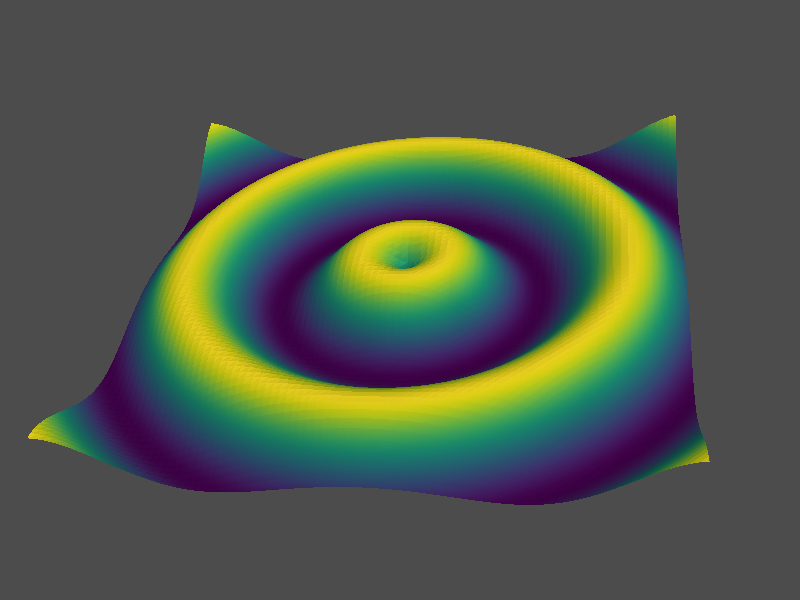

pyvista_ndarray([[-10.        , -10.        ,   0.9920974 ],
                 [-10.        ,  -9.75      ,   0.95490414],
                 [-10.        ,  -9.5       ,   0.88937362],
                 ...,
                 [  9.75      ,   9.25      ,   0.67616076],
                 [  9.75      ,   9.5       ,   0.79305773],
                 [  9.75      ,   9.75      ,   0.88729255]])

In [1]:
# Basic test code - throws errors in Notebook, probably ITK widgets related.
from pyvista import examples
examples.plot_wave()

In [2]:
from pyvista import examples

# list all examples
print(dir(examples))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'antfile', 'beam_example', 'channelsfile', 'delete_downloads', 'dir_path', 'download_action_figure', 'download_armadillo', 'download_bird', 'download_bird_texture', 'download_blood_vessels', 'download_blow', 'download_bolt_nut', 'download_brain', 'download_bunny', 'download_bunny_coarse', 'download_cad_model', 'download_cake_easy', 'download_cake_easy_texture', 'download_carburator', 'download_carotid', 'download_clown', 'download_coastlines', 'download_cow', 'download_cow_head', 'download_crater_imagery', 'download_crater_topo', 'download_damavand_volcano', 'download_disc_quads', 'download_dolfin', 'download_doorman', 'download_dragon', 'download_drill', 'download_emoji', 'download_emoji_texture', 'download_exodus', 'download_face', 'download_face2', 'download_faults', 'download_filled_contours', 'download_foot_bones', 'download_frog', 'download_gears', 'download_gour

## Notebook integration with ITK

See also http://localhost:8888/notebooks/github/ePSproc/epsproc/tests/plottingDev/ITK_tests_070320.ipynb

In [24]:
# 
# https://docs.pyvista.org/plotting/itk_plotting.html

import pyvista as pv

# create a mesh and identify some scalars you wish to plot
mesh = pv.Sphere()
z = mesh.points[:, 2]
mesh['z'] = mesh.points[:,2]

# Plot using the ITKplotter
pl = pv.PlotterITK()
# pl.add_mesh(mesh, scalars=z, smooth_shading=True)  # This gives an error as is, although as per webpage demo
#  RuntimeError: Data field (0.5) not supported.
# Line 62 in ~/anaconda3/envs/epsdev/lib/python3.7/site-packages/pyvista/plotting/itkplotter.py
pl.add_mesh(mesh, scalars='z', smooth_shading=True)  # Works if passed as a label to mesh[scalars], not values
# pl.add_mesh(mesh, smooth_shading=True)  # This works, but only graysale
pl.show(True)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [19]:
# Alternative form...
mesh['z'] = mesh.points[:,2]
# pl = pv.PlotterITK()
# pl.add_mesh(mesh, scalars=z, smooth_shading=True)  # This gives an error as is
# Plot using the ITKplotter
# pv.plot_itk(mesh, scalars=z)  # This has moved...?

In [20]:
mesh

PolyData (0x7fb26a95d9f0)
  N Cells:	1680
  N Points:	842
  X Bounds:	-4.993e-01, 4.993e-01
  Y Bounds:	-4.965e-01, 4.965e-01
  Z Bounds:	-5.000e-01, 5.000e-01
  N Arrays:	2

In [26]:
from itkwidgets import view
# view(mesh=mesh)
view(geometries=mesh)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [ ]:
examples

## Example function surface
https://stackoverflow.com/questions/6030098/how-to-display-a-3d-plot-of-a-3d-array-isosurface-in-matplotlib-mplot3d-or-simil

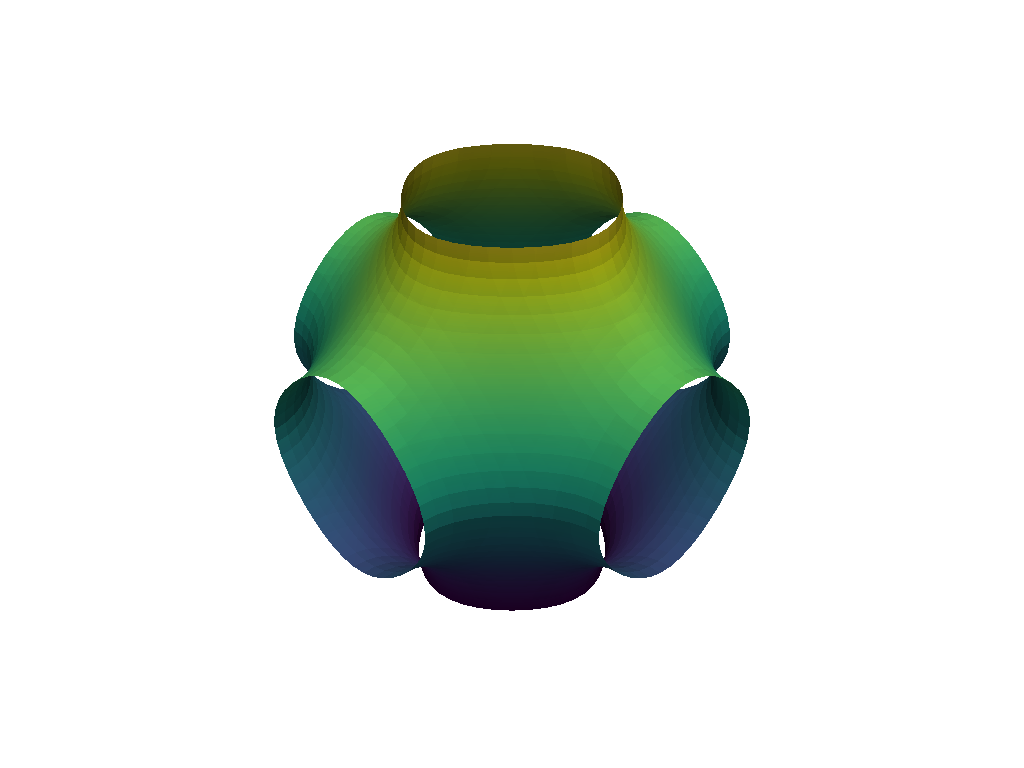

In [40]:
from numpy import cos, pi, mgrid
import pyvista as pv

#%% Data
x, y, z = pi*mgrid[-1:1:31j, -1:1:31j, -1:1:31j]
vol = cos(x) + cos(y) + cos(z)
grid = pv.StructuredGrid(x, y, z)
grid["vol"] = vol.flatten()
# contours = grid.contour([0])  # Original example gives this, equivalent to isosurfaces = [0].
                                # Pass int for # of surfs, or list of surf values, here.
contours = grid.contour(isosurfaces = 3)  # Same result - it's a surface!

#%% Visualization
pv.set_plot_theme('document')
p = pv.Plotter()
p.add_mesh(contours, scalars=contours.points[:, 2], show_scalar_bar=False)
p.show()

In [32]:
grid

StructuredGrid (0x7fb26a8b41a0)
  N Cells:	27000
  N Points:	29791
  X Bounds:	-3.142e+00, 3.142e+00
  Y Bounds:	-3.142e+00, 3.142e+00
  Z Bounds:	-3.142e+00, 3.142e+00
  Dimensions:	31, 31, 31
  N Arrays:	1

In [37]:
?grid.contour

In [41]:
# Try interactive plot...
view(geometries=contours)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

## Method testing

In [48]:
# Try general wrapper for 3D array...
import numpy as np
data = np.random.rand(50,50,50)

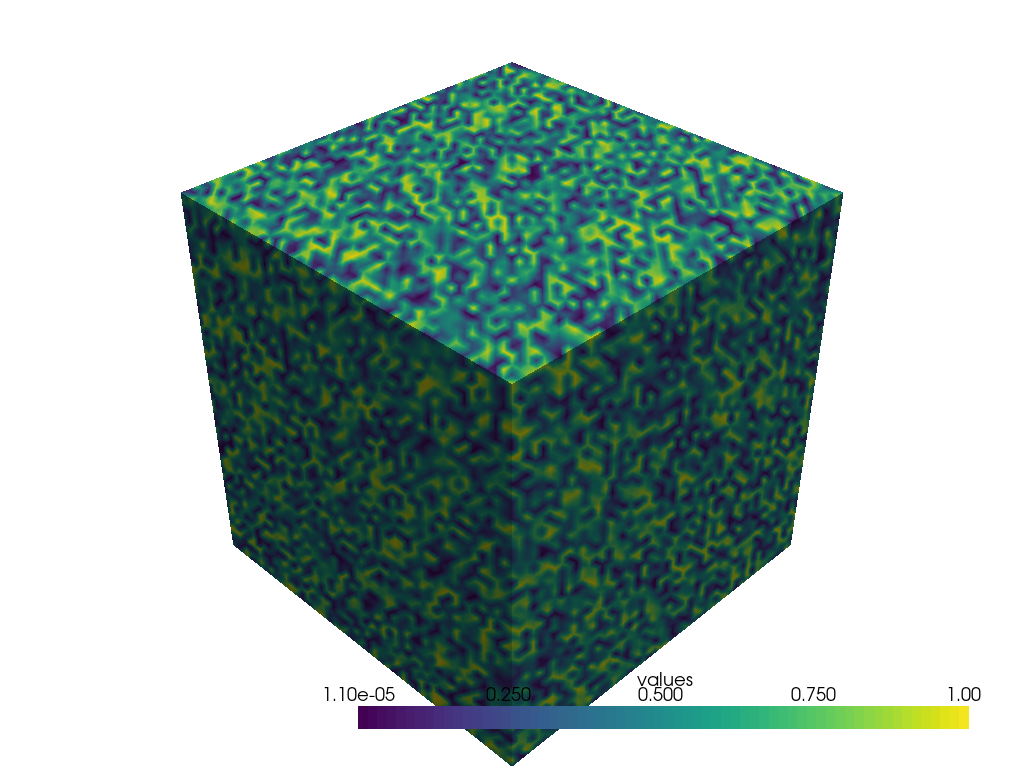

ERROR:root:The interactor must be set prior to enabling/disabling widget


In [49]:
# General pv.wrap - takes VTK obj or np array.
pvObj = pv.wrap(data)
pvObj.plot()

In [52]:
pvObj

UniformGrid (0x7fb2694eb3d0)
  N Cells:	117649
  N Points:	125000
  X Bounds:	0.000e+00, 4.900e+01
  Y Bounds:	0.000e+00, 4.900e+01
  Z Bounds:	0.000e+00, 4.900e+01
  Dimensions:	50, 50, 50
  Spacing:	1.000e+00, 1.000e+00, 1.000e+00
  N Arrays:	1

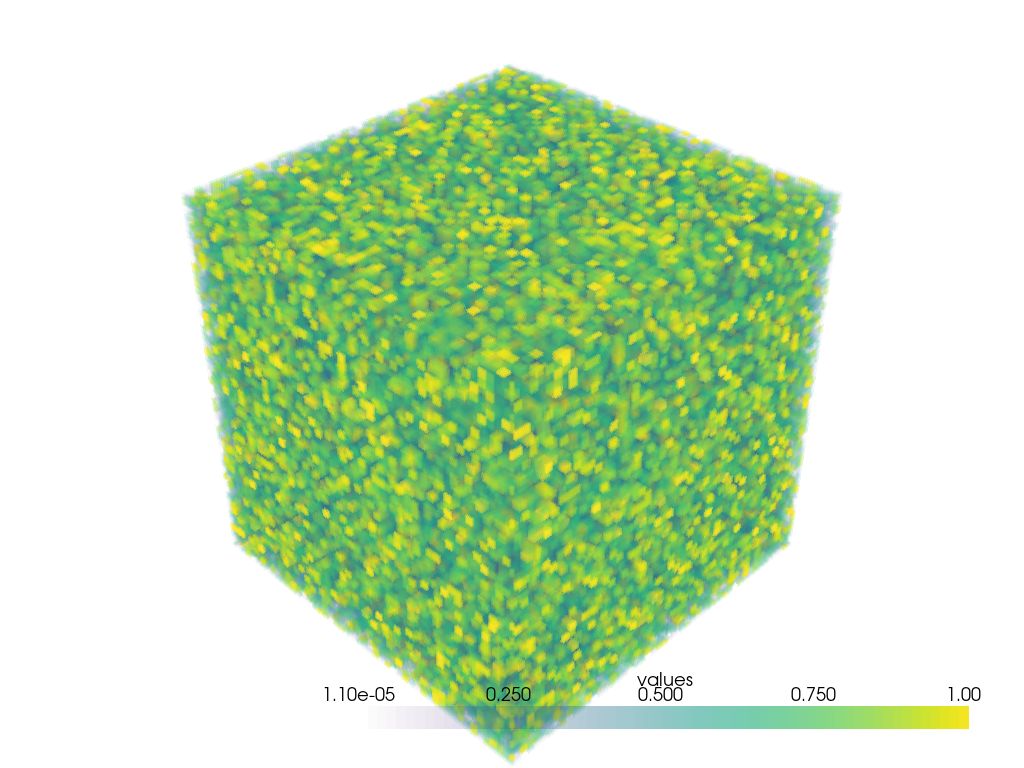

ERROR:root:The interactor must be set prior to enabling/disabling widget


In [51]:
# Direct plotting from np 3D array
pv.plot(data)

In [55]:
# Plot using the ITKplotter (following sphere example above)
pl = pv.PlotterITK()
# pl.add_mesh(pvObj, smooth_shading=True)  # Works if passed data directly, or pvObj
pl.add_mesh(data, smooth_shading=True)  # Works if passed data directly, or pvObj
pl.show(True)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [59]:
# Add more date and test isosurfs...

# Add the data values to the cell data
pvObj.point_arrays['data2'] = pvObj['values']*10*np.random.rand(pvObj['values'].size)  # Note storage as linear array
pvObj


UniformGrid (0x7fb2694eb3d0)
  N Cells:	117649
  N Points:	125000
  X Bounds:	0.000e+00, 4.900e+01
  Y Bounds:	0.000e+00, 4.900e+01
  Z Bounds:	0.000e+00, 4.900e+01
  Dimensions:	50, 50, 50
  Spacing:	1.000e+00, 1.000e+00, 1.000e+00
  N Arrays:	2

In [75]:
# Plot using the ITKplotter (following sphere example above)
pl = pv.PlotterITK()
# pl.add_mesh(pvObj, smooth_shading=True)  # This sets points = 'values' only
pl.add_mesh(pvObj.contour([0.1]), smooth_shading=True)  # Plot iso = 0.1
# pl.add_mesh(pvObj, scalars = 'data2', smooth_shading=True)  # Set data2
# pl.add_mesh(pvObj, point_sets = ['values','data2'], smooth_shading=True)  # Same results
pl.show(True)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [76]:
# Widgets in pop-up plot window
# pyvista.Plotter() Doesn't support widgets in notebook...? Although ITK does?

# pl = pv.Plotter()  
pl = pv.BackgroundPlotter()  # Runs plotter in separate window process.
# pl.add_mesh(pvObj.contour(5), smooth_shading=True)  # This plots a set of isosurfs.
pl.add_mesh_isovalue(pvObj)  # Plot single isosurf with slider for value
# pl.show(True)


(vtkRenderingOpenGL2Python.vtkOpenGLActor)0x7fb2693d9670

## Test with wavefn data...

In [78]:
import sys
import os
import time
import numpy as np

# For module testing, include path to module here
# modPath = r'D:\code\github\ePSproc'
modPath = r'/home/femtolab/github/ePSproc/'
sys.path.append(modPath)
import epsproc as ep

* pyevtk not found, VTK export not available. 
* plotly not found, plotly plots not available. 


In [79]:
# Load data from modPath\data
dataPath = os.path.join(modPath, 'data', 'wavefn')

wfData = ep.readOrb3D(fileBase = dataPath)


*** Scanning dir
/home/femtolab/github/ePSproc/data/wavefn
Found 1 _Orb.dat file(s)



In [83]:
wfData[0][2]

[array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
         4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
         6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
         8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. ]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
        165., 170., 175., 180.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
        165., 170., 175., 180., 185., 190., 195., 200., 205., 210., 215.,
        220., 225., 230., 235., 240., 245., 250., 255., 260., 265., 270.,
        275., 280., 285., 

In [96]:
wfData[0][3][0].shape

(51, 37, 73)

In [102]:
# Try replicating VTK structure from ep.writeOrb3Dvtk()

# wfPv = pv.StructuredGrid(wfData[0][2][1], wfData[0][2][0], wfData[0][2][2])  # Direct case has issues!
wfPvGrid = pv.RectilinearGrid(wfData[0][2][1], wfData[0][2][0], wfData[0][2][2])  # This is OK for passing linear vals.

# Try meshgrid version for structured case
[T,R,P] = np.meshgrid(wfData[0][2][1], wfData[0][2][0], wfData[0][2][2])
T = (T*np.pi/180) #-np.pi/2
P = P*np.pi/180
x = R*np.sin(P)*np.cos(T)
z = R*np.cos(P)
y = R*np.sin(P)*np.sin(T)

wfPv = pv.StructuredGrid(x,z,y)



# wfPv.add_point_arrays({'Re': wfData[0][3][0], 'Im': wfData[0][3][1], 'Abs': wfData[0][3][2]})

# wfPv.add_field_array(wfData[0][3][0].flatten(order="F"), 'Re')  # This works... but isosurf complains this is cell data
wfPv.point_arrays['Re']=wfData[0][3][0].flatten(order="F")

In [92]:
wfPvGrid

RectilinearGrid,Information
N Cells,129600
N Points,137751
X Bounds,"0.000e+00, 1.800e+02"
Y Bounds,"0.000e+00, 1.000e+01"
Z Bounds,"0.000e+00, 3.600e+02"
Dimensions,"37, 51, 73"
N Arrays,0


In [103]:
wfPv

StructuredGrid (0x7fb2694e7670)
  N Cells:	129600
  N Points:	137751
  X Bounds:	-1.000e+01, 1.000e+01
  Y Bounds:	-1.000e+01, 1.000e+01
  Z Bounds:	-1.000e+01, 1.000e+01
  Dimensions:	51, 37, 73
  N Arrays:	1

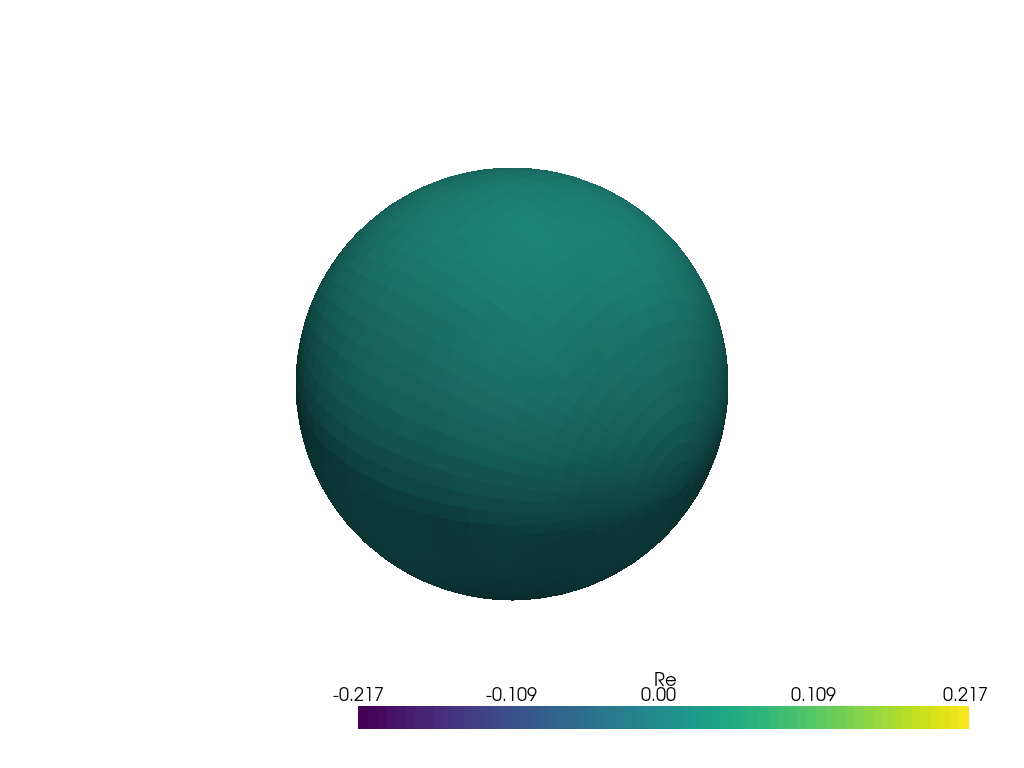

ERROR:root:The interactor must be set prior to enabling/disabling widget


In [104]:
wfPv.plot()

In [106]:
# This works, although plot is pretty basic (just single iso)

pl = pv.BackgroundPlotter()  # Runs plotter in separate window process.
# pl.add_mesh(pvObj.contour(5), smooth_shading=True)  # This plots a set of isosurfs.
pl.add_mesh_isovalue(wfPv, scalars = 'Re')  # Plot single isosurf with slider for value
# pl.show(True)


(vtkRenderingOpenGL2Python.vtkOpenGLActor)0x7fb24955e4b0

In [112]:
contours = wfPv.contour(isosurfaces = [-0.01, 0.01])  # Nice

#%% Visualization
# pv.set_plot_theme('document')
p = pv.PlotterITK()
# p.add_mesh(contours, scalars=contours.points[:, 2], show_scalar_bar=False)  # OK for Plotter(), but no ITK()
p.add_mesh(contours)
p.show()

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [113]:
contours

PolyData (0x7fb24953d6e0)
  N Cells:	67740
  N Points:	34364
  X Bounds:	-6.604e+00, 6.604e+00
  Y Bounds:	-8.308e+00, 8.308e+00
  Z Bounds:	-7.895e+00, 8.048e+00
  N Arrays:	1

## Other things to test...

In [ ]:
# https://docs.pyvista.org/core/point-grids.html
grid = pv.StructuredGrid(x, y, z)
grid.plot(show_edges=True, screenshot='structured_cube.png')